# Movie Genre Prediction(MGP) using NLP
*Hemansh Anand*

---

# Notebook 4: Hyperparameter Optimization and Cross Validation

The main purpose of this notebook is to compare the results of previous experiments. After comparison, the top 2 models have been optimized using hyperparameters. Later the best model is cross validated and the best results are then discussed.

**This notebook accomplishes three primary tasks:**

1.   Fit and Export the best model.
2.   Discuss the best results.
3.   Evaluate the overall attempt and outcome.




### Import Libraraies

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
import joblib

from ast import literal_eval

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, recall_score, precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

We will now compare the results of our first Experiment_Setup_1. We had experimented with two parameters for TF-IDF Vectorization which are given below:

*   Variation 1 (min_df=0.005, max_df=)
*   Variation 2 (min_df=20)

Best models from both the Variations have been shortlisted and are presented here for comparison.

Best model from Variation 1

In [ ]:
results_exp1_var1 = pd.read_csv('/content/drive/MyDrive/Colab Files/MGP/Results/TFIDF min max/Best_Result_min_max.csv', index_col=0)
results_exp1_var1

,Test Precission Score,Test Recall Score,Test F1 Score,Train Precission Score,Train Recall Score,Train F1 Score
Logistic Regression,0.677748,0.462405,0.530831,0.778086,0.526134,0.605359


Best model from Experiment 1 Variation 2

In [ ]:
results_exp1_var2 = pd.read_csv('/content/drive/MyDrive/Colab Files/MGP/Results/TFIDF min_20/Best Results min_20.csv', index_col=0)
results_exp1_var2

,Test Precission Score,Test Recall Score,Test F1 Score,Train Precission Score,Train Recall Score,Train F1 Score
Logistic Regression,0.689100,0.490187,0.572868,0.869420,0.639843,0.737171
MNB,0.652473,0.532875,0.586641,0.724076,0.622284,0.669332


After comparing the results from both the variations, it is clear that Experiment 1 Variation 2 has performed better. It is now time to perform some hyperparameter tuning to these two models to find out which one is superior and shall be used in our Movie Genre Prediction.

## Import the Dataset

Importing Train and Test dataframes from the previous notebook.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Files/Movie Genre/Modified Datasets/train.csv', index_col=0)
test = pd.read_csv('/content/drive/MyDrive/Colab Files/Movie Genre/Modified Datasets/test.csv', index_col=0)

In [ ]:
train.head()

,00,000,10,100,11,12,13,13th,14,15,16,17,17th,18,18th,19,1900,1920,1930,1936,1939,1940,1941,1942,1943,1944,1945,1950,1955,1959,1960,1962,1963,1964,1965,1966,1968,1969,1970,1971,...,yearn,yellow,yet,york,yorker,you,young,younger,youngest,youngster,youth,yu,yugoslavia,zealand,zero,zombi,zone,zoo,gen_action,gen_adventure,gen_animation,gen_biography,gen_comedy,gen_crime,gen_documentary,gen_drama,gen_family,gen_fantasy,gen_film-noir,gen_history,gen_horror,gen_music,gen_musical,gen_mystery,gen_romance,gen_sci-fi,gen_sport,gen_thriller,gen_war,gen_western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.072327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269463,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.132509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


### Splitting Data into X and y



* X contains the features
*   y contains the genres



In [ ]:
cols = list(train.columns.values)
genre_cols = cols[-22:]
print(len(genre_cols))
print(genre_cols)

22
['gen_action', 'gen_adventure', 'gen_animation', 'gen_biography', 'gen_comedy', 'gen_crime', 'gen_documentary', 'gen_drama', 'gen_family', 'gen_fantasy', 'gen_film-noir', 'gen_history', 'gen_horror', 'gen_music', 'gen_musical', 'gen_mystery', 'gen_romance', 'gen_sci-fi', 'gen_sport', 'gen_thriller', 'gen_war', 'gen_western']


In [ ]:
X_train = train[train.columns[~train.columns.isin(genre_cols)]]
y_train = train[train.columns[ train.columns.isin(genre_cols)]]

X_test = test[test.columns[~test.columns.isin(genre_cols)]]
y_test = test[test.columns[ test.columns.isin(genre_cols)]]

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
mima_scaler = MinMaxScaler().fit(X_train)
X_train_mima = mima_scaler.transform(X_train)
X_test_mima = mima_scaler.transform(X_test)

joblib.dump(mima_scaler, '/content/drive/MyDrive/Colab Files/MGP/Trained Models/TFIDF_min_max/Scalers/mima_scaler.pkl')

['/content/drive/MyDrive/Colab Files/MGP/Trained Models/TFIDF_min_max/Scalers/mima_scaler.pkl']

## Expermient 3 Hyperparameter Optimization

*   Logistic Regression with c = [0.01, 0.1, 1]
*   Multinomial Naive Bayes with alpha = [0.01, 0.1, 1]



### Logistic Regression with c = [0.01, 0.1, 1]

In [ ]:
c_val = [0.01, 0.1, 1]

for c in c_val:
    model_1 = OneVsRestClassifier(LogisticRegression(random_state=123, max_iter=3000, C=c, n_jobs=-1), n_jobs=-1).fit(X_train_mima, y_train)
        
    # export the model
    joblib.dump(model_1, f'/content/drive/MyDrive/Colab Files/MGP/Trained Models/parameter tuning/legreg_mima_{c}.pkl')

    # Make predictions
    y_train_model_1 = model_1.predict(X_train_mima)
    y_pred_model_1 = model_1.predict(X_test_mima)

    from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

    # Recall Score
    print(f'C:  {c}')
    train_recall_score = recall_score(y_train, y_train_model_1, average='weighted')
    test_recall_score = recall_score(y_test, y_pred_model_1, average='weighted')
    print('Train Recall Score:',train_recall_score)
    print('Test Recall Score:',test_recall_score)

    # Precision Score
    train_precision_score = precision_score(y_train, y_train_model_1, average='weighted')
    test_precision_score = precision_score(y_test, y_pred_model_1, average='weighted')
    print('Train Precision Score:',train_precision_score)
    print('Test Precision Score:',test_precision_score)

    # F1 Score
    train_f1_score = f1_score(y_train, y_train_model_1, average='weighted')
    print('Train F1 Score:',train_f1_score)
    test_f1_score = f1_score(y_test, y_pred_model_1, average='weighted')
    print('Test F1 Score:',test_f1_score)

C:  0.01
Train Recall Score: 0.20634973570559104
Test Recall Score: 0.2001892807332138


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Precision Score: 0.5351997345963526
Test Precision Score: 0.4354281120894809
Train F1 Score: 0.18630677161001544
Test F1 Score: 0.17880294856425905
C:  0.1
Train Recall Score: 0.4059795567857798
Test Recall Score: 0.3671050009962144


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Precision Score: 0.8301835546790085
Test Precision Score: 0.7587101351235627
Train F1 Score: 0.4844188022924335
Test F1 Score: 0.4393929814834858
C:  1
Train Recall Score: 0.6398425905854497
Test Recall Score: 0.49018728830444314
Train Precision Score: 0.8694203140770593
Test Precision Score: 0.6891000561352323
Train F1 Score: 0.7211126264442678
Test F1 Score: 0.556423947353071


### Multinomial Naive Bayes with alpha = [0.01, 0.1, 1]

In [ ]:
a_val = [0.01, 0.1, 1]

for a in a_val:
    model_7 = OneVsRestClassifier(MultinomialNB(alpha=a), n_jobs=-1).fit(X_train_mima, y_train)
    
    # export the model
    joblib.dump(model_7, f'/content/drive/MyDrive/Colab Files/Movie Genre/Final Trained Models/MNB/model_7_{a}.pkl')
    
    # Make predictions
    y_train_model_7 = model_7.predict(X_train_mima)
    y_pred_model_7 = model_7.predict(X_test_mima)

    from sklearn.metrics import classification_report, recall_score, precision_score

    train_recall_score = recall_score(y_train, y_train_model_7, average='weighted')
    test_recall_score = recall_score(y_test, y_pred_model_7, average='weighted')
    print(f'Alpha:  {a}')
    print('Train Recall Score:',train_recall_score)
    print('Test Recall Score:',test_recall_score)

    train_precision_score = precision_score(y_train, y_train_model_7, average='weighted')
    test_precision_score = precision_score(y_test, y_pred_model_7, average='weighted')
    print('Train Precision Score:',train_precision_score)
    print('Test Precision Score:',test_precision_score)
    
    # F1 Score
    train_f1_score = f1_score(y_train, y_train_model_7, average='weighted')
    print('Train F1 Score:',train_f1_score)

    test_f1_score = f1_score(y_test, y_pred_model_7, average='weighted')
    print('Test F1 Score:',test_f1_score)
    


Alpha:  0.01
Train Recall Score: 0.6729252472028147
Test Recall Score: 0.5346184498904164
Train Precision Score: 0.7304812057913629
Test Precision Score: 0.6457024044004941
Train F1 Score: 0.6977081837684609
Test F1 Score: 0.5751450907183039
Alpha:  0.1
Train Recall Score: 0.6694068799919961
Test Recall Score: 0.5445805937437737
Train Precision Score: 0.7249121807851051
Test Precision Score: 0.6464274162821652
Train F1 Score: 0.6929876705225838
Test F1 Score: 0.5825155984904712
Alpha:  1
Train Recall Score: 0.622284103983592
Test Recall Score: 0.5328750747160789
Train Precision Score: 0.7240758473671053
Test Precision Score: 0.6524731443418311
Train F1 Score: 0.6590790049701707
Test F1 Score: 0.5738608522714271
CPU times: user 1min 31s, sys: 27.7 s, total: 1min 59s
Wall time: 2min 28s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Results

In [ ]:
results_tuning = pd.read_csv('/content/drive/MyDrive/Colab Files/MGP/Results/After parameter tuning.csv', index_col=0)
results_tuning

,Alpha/C,Test Precission Score,Test Recall Score,Test F1 Score,Train Precission Score,Train Recall Score,Train F1 Score
Classifier,,,,,,,
Logistic Regression,0.01,0.435428,0.200189,0.178803,0.535200,0.206350,0.186307
Logistic Regression,0.10,0.758710,0.367105,0.439393,0.830184,0.405980,0.484419
Logistic Regression,1.00,0.689100,0.490187,0.556424,0.869420,0.639843,0.721113
MultnimoialNB,0.01,0.645702,0.534618,0.575145,0.730481,0.672925,0.697708
MultnimoialNB,0.10,0.646427,0.544581,0.582516,0.724912,0.669407,0.692988
MultnimoialNB,1.00,0.652473,0.532875,0.573861,0.724076,0.622284,0.659079


From the above results, it acn be seen that MultnimoialNB with alpha=0.10 performs the best. 

## Cross Validation

### Multinomial Naive Bayes (alpha=0.10)

In [ ]:
from sklearn.model_selection import cross_val_score
model_12 = OneVsRestClassifier(MultinomialNB(alpha=0.1), n_jobs=-1)

scores = cross_val_score(model_12, X_train_mima, y_train, cv = 5)

for i in range(len(scores)) :
    print(f"Fold {i+1}: {scores[i]}")
print(f"The average score is :{np.mean(scores)}")

Fold 1: 0.1335700022187708
Fold 2: 0.12250332889480692
Fold 3: 0.13382157123834887
Fold 4: 0.13559698180204172
Fold 5: 0.12960497114957834
The average score is :0.13101937106070932


In [ ]:
model_12 = OneVsRestClassifier(MultinomialNB(alpha=0.1), n_jobs=-1).fit(X_train_mima, y_train)

# export and save model
joblib.dump(model_12, '/content/drive/MyDrive/Colab Files/Movie Genre/Final Trained Models/Cross Validated Models/MNB_0.1.pkl')

['/content/drive/MyDrive/Colab Files/Movie Genre/Final Trained Models/Cross Validated Models/MNB_0.1.pkl']

## Discussion of Best Results

The measure of best results for this project is the highest F1 score on the test set. 

After experimenting with 4 Different Setups:


1.   TF-IDF (two variations)
2.   Scaling (two variations)
3.   3 Different Classification Models
4.   Hyper Parameter Tuning between the top 2 models

I conclude that the best model is OneVsRest with Multnimoial  Naive Bayes using TF-IDF plot vectors (min_df=20) and Min Max Scaling. 

Yes, I had to retrain the model with different parameters during the experimentation.

Below are the main conclusions:



*   MultnimoialNB showed good accuracy rate. The lowest accuracy rate is around 70% and the highest accuracy rate is around 98%.
*   MultnimoialNB is much faster to implement than other models and it is my preferred choice for deploying in the Movie Genre Prediction.



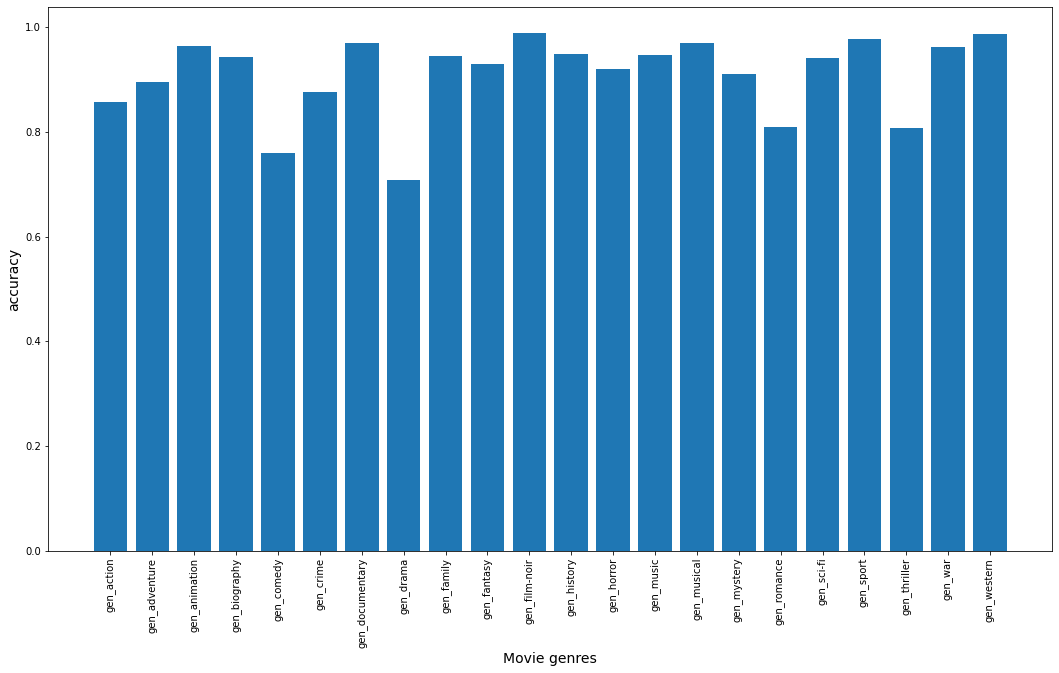

In [ ]:
plt.figure(figsize=(18,10))
p1 =plt.bar(scores_df.Genres, height=scores_df.Scores)
plt.xticks( rotation=90)
# plt.title("Movies genre classification accuracy (multinomialNB VS LinearSVC)")
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('Movie genres', fontsize=14)
# plt.legend(p1[0]), ('Scores'))
plt.show()

In [ ]:
y_train_pred = model_12.predict(X_train_mima)
y_test_pred = model_12.predict(X_test_mima)
y_train_proba = model_12.predict_proba(X_train_mima)
y_test_proba = model_12.predict_proba(X_test_mima)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
print(f'Training F1 score: {f1_score(y_train, y_train_pred,average="weighted"):0.4f}')
print(f'    Test F1 score: {f1_score(y_test, y_test_pred,average="weighted"):0.4f}')
print(f'Training Accuracy Score: {accuracy_score(y_train, y_train_pred):0.4f}')
print(f'    Test Accuracy Score: {accuracy_score(y_test, y_test_pred):0.4f}')

Training F1 score: 0.6930
    Test F1 score: 0.5825
Training Accuracy Score: 0.2189
    Test Accuracy Score: 0.1373


Confusion Matrix

In [ ]:
cmatrix = multilabel_confusion_matrix(y_test, y_test_pred)

gen_cm_list = []
for gen in cmatrix:
    gen_cm_list.append(pd.DataFrame(gen, columns=[' Positive', ' Negative  '], index=['Positive','Negative']))
    
gen_cm_list[10].values

array([[7426,    4],
       [  77,    4]])

In [ ]:
cf_matrix=gen_cm_list[10].values

In [ ]:
y_pred_df = pd.DataFrame(y_test_pred, columns=genre_cols)
score=[]
# Test set predictions
for gen in genre_cols:
    score.append([accuracy_score(y_test[gen], y_pred_df[gen])])
print(score)

[[0.8576754093995473], [0.8945546531753429], [0.9640527226734124], [0.9428837704699774], [0.7595526561043803], [0.8763147383837039], [0.968845692983624], [0.7085607775262948], [0.9440820130475303], [0.9298362401810678], [0.9892158168020238], [0.9487418452935694], [0.919185195047264], [0.9471441885234989], [0.9696445213686593], [0.9101318066835308], [0.8092131540407402], [0.940354147250699], [0.9781653574757023], [0.8081480495273599], [0.9628544800958594], [0.9868193316469178]]


In [ ]:
scores_df = pd.DataFrame.from_records(score)
gen_df = pd.DataFrame({'Genre':genre_cols})

In [ ]:
scores_df.insert(1,"Genre",genre_cols,True)

In [ ]:
scores_df.columns = ['Scores', 'Genres']
scores_df

,Scores,Genres
0,0.857675,gen_action
1,0.894555,gen_adventure
2,0.964053,gen_animation
3,0.942884,gen_biography
4,0.759553,gen_comedy
5,0.876315,gen_crime
6,0.968846,gen_documentary
7,0.708561,gen_drama
8,0.944082,gen_family
9,0.929836,gen_fantasy


We now take a closer look at the complete classification report for each genre in this model.

In [ ]:
from sklearn.metrics import classification_report
test_classification_report= classification_report(y_test, y_test_pred, target_names=genre_cols)
train_classification_report= classification_report(y_train, y_train_pred, target_names=genre_cols)
print(train_classification_report)
print(test_classification_report)

                 precision    recall  f1-score   support

     gen_action       0.69      0.67      0.68      4086
  gen_adventure       0.63      0.59      0.61      2477
  gen_animation       0.68      0.60      0.64       733
  gen_biography       0.63      0.57      0.60      1207
     gen_comedy       0.72      0.68      0.70      7861
      gen_crime       0.71      0.61      0.65      3710
gen_documentary       0.75      0.81      0.78       976
      gen_drama       0.77      0.81      0.79     12611
     gen_family       0.80      0.49      0.60      1363
    gen_fantasy       0.69      0.50      0.58      1790
  gen_film-noir       0.89      0.78      0.83       230
    gen_history       0.61      0.66      0.63      1052
     gen_horror       0.79      0.72      0.75      3013
      gen_music       0.81      0.52      0.63      1375
    gen_musical       0.84      0.51      0.63       647
    gen_mystery       0.66      0.47      0.55      2090
    gen_romance       0.66    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Evaluation of Overall Attempt and Outcome

Yes, the orignal problem has been solved. The goals mentioned in the problem statement(Notebook 1) have been achieved.

Finally our model is now ready with a good F1 Score of 0.58

It's time to export the model and move to the next stage of deployment.

# Export and Saving the model

In [ ]:
final_model = OneVsRestClassifier(MultinomialNB(alpha=0.10), n_jobs=-1).fit(X_train_mima, y_train)

# export and save the model for later use
joblib.dump(final_model, '/content/drive/MyDrive/Colab Files/MGP/Final Model/final_model_MNB_0.10.pkl')

['/content/drive/MyDrive/Colab Files/MGP/Final Model/final_model_MNB_0.10.pkl']